<a href="https://colab.research.google.com/github/jefffang19/cv_hw/blob/master/cvHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/cv.png"

In [7]:
img = cv2.imread(path)

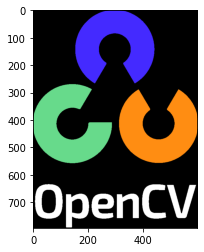

In [8]:
plt.imshow(img)

# Objective


```
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```



In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

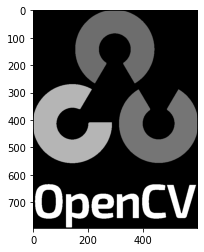

In [10]:
plt.imshow(img_gray, cmap = 'gray')

# We implement above function ourself

In [11]:
img.shape

(794, 600, 3)

# Get R, G, B channels

In [12]:
imgR = img[..., 0] # R
imgG = img[..., 1] # G
imgB =img[..., 2] # B

In [13]:
imgR.shape

(794, 600)

# transform to grayscale

In [14]:
# elementwise multiply
img_gray = np.multiply(imgR,0.299) + np.multiply(imgG,0.587) + np.multiply(imgB,0.114)

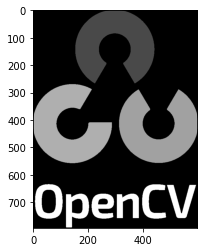

In [15]:
plt.imshow(img_gray, cmap='gray')

# threshold function

# objective


```
cv2.threshold(x, low_bound, up_bound, cv2.THRESH_TOZERO)
```



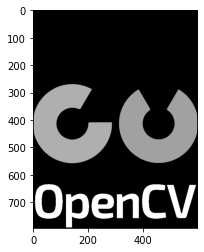

In [98]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh1, cmap='gray')

# My Implementation

In [57]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/cv.png"

In [103]:
def myThresh(in_img, lower_thresh, upper_thresh):
  if(0<=upper_thresh<=255 and 0<=lower_thresh<=255):
    up_th = np.less_equal(in_img, upper_thresh)
    low_th = np.greater(in_img, lower_thresh)
    return np.multiply(np.multiply(in_img,low_th), up_th)
  else:
    print('wrong value')

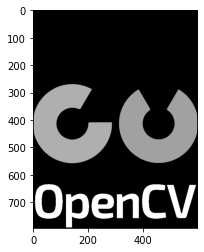

In [100]:
result = myThresh(img_gray, 127, 255)

plt.imshow(result, cmap='gray')

In [104]:
myThresh(img, 127, 278)

wrong value


# Segmentation Model

In [105]:
!pip install -U segmentation-models

     |████████████████████████████████| 51kB 4.9MB/s 


In [106]:
!pip install tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 39kB/s 
     |████████████████████████████████| 512kB 35.9MB/s 
     |████████████████████████████████| 3.8MB 34.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=303fb608992f90b1de0dcc301e7140e0346db9a85d1901b9db1c766698b35934
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
 

In [107]:
import tensorflow as tf

In [108]:
tf.__version__

'1.15.0'

In [109]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


# Set Model backbone

In [110]:
model = sm.Unet(backbone_name='vgg16', encoder_weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 2s 0us/step


In [111]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Test Fit Model

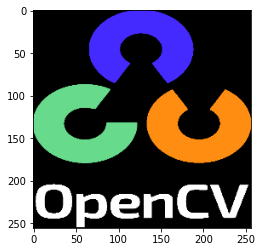

In [112]:
# image size according to the decoder filter of the model -> (256,128,64,32,16)
x = cv2.resize(img, (256,256))
plt.imshow(x)

In [113]:
# increase dimmension for batch_size
x = x[np.newaxis, :]
x.shape

(1, 256, 256, 3)

In [114]:
predict_img = model.predict(x)

In [115]:
p = predict_img.reshape((256,256))

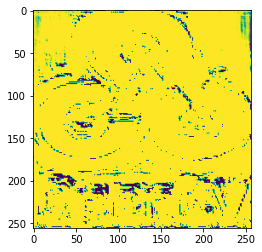

In [116]:
plt.imshow(p)

In [117]:
predict_img.shape

(1, 256, 256, 1)

In [118]:
#overlap the predict img and the origin img
result = predict_img[0] + x[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


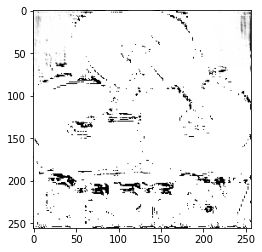

In [119]:
plt.imshow(result)

In [120]:
import glob

In [121]:
!ls "/content/gdrive/My Drive/iir_training_python/cvHW/f01"

image  label


# Import Training Data

In [122]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/*.png")

In [123]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [124]:
images = [cv2.imread(i) for i in filenames]

In [125]:
# normalize
images = [i/255 for i in images] 

In [126]:
#resize to fit model
images = [cv2.resize(i, (493,1184)) for i in images]

In [127]:

images[0].shape

(1184, 493, 3)

In [128]:
images = [cv2.imread(i) for i in filenames]

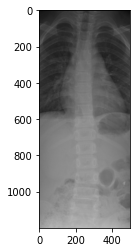

In [129]:
plt.imshow(images[0])
images = [i/255 for i in images] 
images = [cv2.resize(i, (493,1184)) for i in images]

# Import training Labels

In [130]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/*.png")

In [131]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [140]:
labels = [cv2.imread(i) for i in filenames]

In [141]:
labels = [i/255 for i in labels]

In [142]:
labels = [cv2.resize(i,(493,1184)) for i in labels]

In [143]:
len(labels)

20

In [144]:
labels[0].shape

(1184, 493, 3)

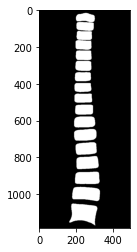

In [145]:
plt.imshow(labels[0])

# Split Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
index_train, index_test = train_test_split(range(20),test_size=0.2, shuffle=True)

In [ ]:
index_train

[18, 6, 4, 19, 14, 3, 2, 8, 9, 15, 1, 12, 0, 10, 7, 17]

In [ ]:
index_test

[11, 16, 13, 5]

In [ ]:
# divide the imgs and labels
x_train = [images[i] for i in index_train]
x_test = [images[i] for i in index_test]
y_train = [labels[i] for i in index_train]
y_test = [labels[i] for i in index_test]

In [ ]:
# convert fit data into type numpy
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_test.shape

(4, 960, 480, 3)

# data augmentation  (TBD)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# we need to create 2 augmentation generator, and they must take same augument
imageAugGen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
labelAugGen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
# provide same seed
seed = 1
imageAugGen.fit(x_train, augment=True, seed=seed)
labelAugGen.fit(y_train, augment=True, seed=seed)

In [ ]:
#combine
dataAugGen = imageAugGen+labelAugGen

TypeError: ignored

In [ ]:
plt.imshow(x_train[0])

# Fit model

In [ ]:
model = sm.Unet(backbone_name='vgg16', encoder_weights='imagenet')

In [ ]:
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

In [ ]:
x_train.shape

(16, 960, 480, 3)

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=4, epochs=10, validation_split=0.2)

Train on 12 samples, validate on 4 samples
Epoch 1/10
12/12 [==============================] - 3s 269ms/sample - loss: 0.1210 - iou_score: 0.9159 - val_loss: 0.6356 - val_iou_score: 0.6302
Epoch 2/10
12/12 [==============================] - 3s 261ms/sample - loss: 0.1205 - iou_score: 0.9163 - val_loss: 0.4683 - val_iou_score: 0.6946
Epoch 3/10
 4/12 [=========>....................] - ETA: 1s - loss: 0.1116 - iou_score: 0.9202

KeyboardInterrupt: ignored

#Test Predict

In [ ]:
test_img = x_test[0][np.newaxis, :]

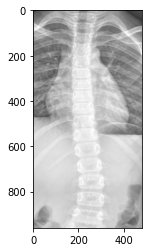

In [ ]:
plt.imshow(test_img[0])

In [ ]:
predict_img = model.predict(test_img)

In [ ]:
p = predict_img.reshape((960,480))

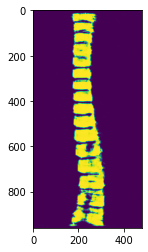

In [ ]:
plt.imshow(p)

In [ ]:
p = cv2.cvtColor(p, cv2.COLOR_GRAY2RGB)
p.shape

(960, 480, 3)

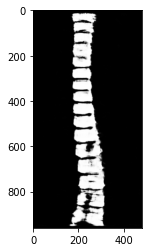

In [ ]:
plt.imshow(p)

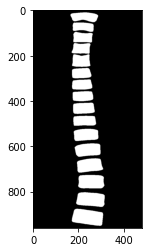

In [ ]:
plt.imshow(y_test[0])

In [ ]:
show_img = predict_img[0] + test_img[0]

In [ ]:
show_img.shape

(960, 480, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


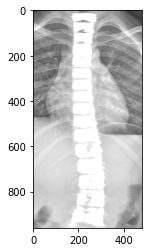

In [ ]:
plt.imshow(show_img)

In [ ]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/model_vgg16"

In [ ]:
model.save(path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


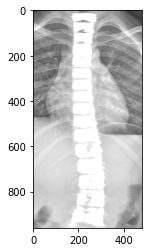

In [ ]:
plt.imshow(show_img)

# iou

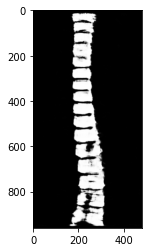

In [ ]:
plt.imshow(p)

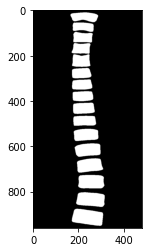

In [ ]:
plt.imshow(y_test[0])

In [ ]:
model.predict(x)

# Testing Datas

In [ ]:
test_images_names = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f03/image/*.png")
test_labels_names = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f03/label/*.png")

In [ ]:
test_labels_names.sort()
test_images_names.sort()

In [ ]:
images = [cv2.imread(i) for i in test_images_names]
images = [i/255 for i in images] 
images = [cv2.resize(i, (480,960)) for i in images]

In [ ]:
labels = [cv2.imread(i) for i in test_labels_names]
labels = [i/255 for i in labels] 
labels = [cv2.resize(i, (480,960)) for i in labels]

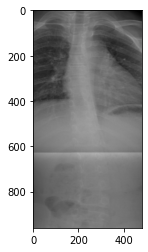

In [ ]:
plt.imshow(images[1])

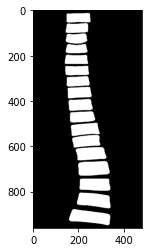

In [ ]:
plt.imshow(labels[1])

In [ ]:
test_img = images[11][np.newaxis, :]

In [ ]:
r = model.predict(test_img, verbose=1)

1/1 [==============================] - 0s 124ms/sample


In [ ]:
r.shape

(1, 960, 480, 1)

In [ ]:
p = r.reshape((960,480))

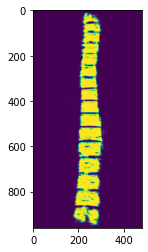

In [ ]:
plt.imshow(p)

# Convert img from float to uint8

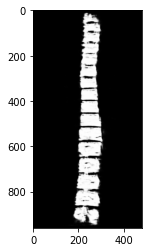

In [ ]:
i = p*255
i = i.astype(np.uint8)
i = cv2.cvtColor(i,cv2.COLOR_GRAY2RGB)

plt.imshow(i)

# WaterShed

In [ ]:
meanshif = cv2.pyrMeanShiftFiltering(i, 21, 51)
gray = cv2.cvtColor(meanshif, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

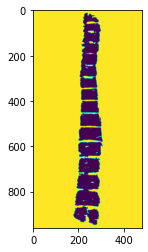

In [ ]:
plt.imshow(thresh)

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 1)

_erode = cv2.erode(opening, kernel, iterations = 3)
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

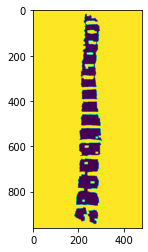

In [ ]:
plt.imshow(sure_bg)

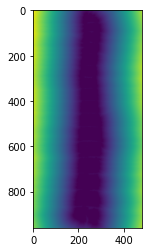

In [ ]:
plt.imshow(dist_transform)

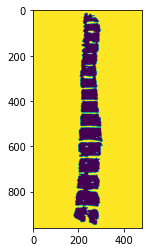

In [ ]:
plt.imshow(sure_fg)

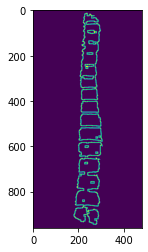

In [ ]:
plt.imshow(unknown)

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)
print(np.unique(markers))
markers = markers+1
print(np.unique(markers))

markers[unknown==255] = 0

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


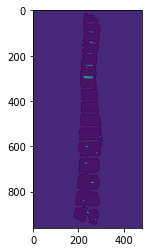

In [ ]:
plt.imshow(markers)

In [ ]:
markers = cv2.watershed(i,markers)
i[markers == -1] = [256,0,0]

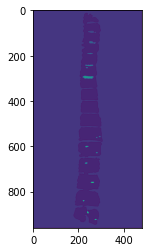

In [ ]:
plt.imshow(markers)

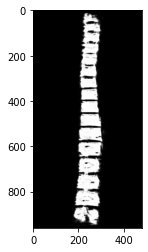

In [ ]:
plt.imshow(i)

In [ ]:
np.unique(markers)

array([-1,  1,  2,  3], dtype=int32)

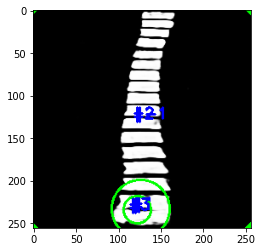

In [ ]:
import imutils
for label in np.unique(markers):
	# 如果該標籤爲0，則表示其爲背景，直接忽略
	if label == 0:
		continue

	# 爲標籤區域分配內存並將在mask上繪製結果
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[markers == label] = 255

	# 在mask上檢測輪廓並獲得最大的一個輪廓
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# 畫一個圈把物體圍起來
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(i, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(i, "#{}".format(label), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
plt.imshow(i)